References for parameter tuning in xgbclassifier<br>
https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook<br>
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from xgboost import XGBClassifier
import os

In [2]:
stop_words = stopwords.words('english')

In [3]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
data = pd.read_csv(r"D:\F\projects\lakebrains\Empathy-Mental-Health-master\Empathy-Mental-Health-master\empathy_data_wo_expo.csv")

In [5]:
data = data[['response_post','level']]

In [6]:
data.head()

,response_post,level
0,"That's pretty vague, do you not know what you'...",0
1,idk what a Red pill means exactly but my advic...,0
2,"I think it's social anxiety , that creates par...",1
3,By any chance do you think you're in a loop. J...,1
4,depression. not sadness which is caused by som...,1


In [7]:
data_neg = pd.read_csv(r"../data/empathybalaceddata.csv")
data_neg = data_neg[['text']]
data_neg = data_neg.rename(columns = {'text':'response_post'})
data_neg['level'] = 0
data_neg.head()

,response_post,level
0,>sexuality shouldn’t be a grouping category I...,0
1,Oi us cancers don’t want him either! We respec...,0
2,I unfortunately can not afford a lawyer. Lucki...,0
3,OMG THOSE TINY SHOES! *desire to boop snoot in...,0
4,I would pay money for [NAME] to not be my nurs...,0


In [8]:
data = pd.concat([data,data_neg])

In [9]:
data.shape

(4213, 2)

In [10]:
data = data.reset_index(drop=True)

In [11]:
data

,response_post,level
0,"That's pretty vague, do you not know what you'...",0
1,idk what a Red pill means exactly but my advic...,0
2,"I think it's social anxiety , that creates par...",1
3,By any chance do you think you're in a loop. J...,1
4,depression. not sadness which is caused by som...,1
...,...,...
4208,The gospel ruth,0
4209,The counter-clockwise was a bit too much for e...,0
4210,"Get woke, go broke.",0
4211,>I have always been fairly short (5'9) Is this...,0


In [12]:
data.to_csv(r'../data/empathybalaceddata.csv',index=False)

In [28]:
wnl = WordNetLemmatizer()

In [29]:
def preprocess(review):
   
    new_review = ''
    try:
        # for every sentence, we perform the necessary pre-processing
        text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+",' ',str(review).lower()).strip()
        text = re.sub(r'[0-9]+', '', text)
        text = [wnl.lemmatize(i) for i in text.split(' ') if i not in stop_words]
        new_review = ' '.join(text) # form back into a sentence
        return new_review
    except Exception as e:
        print(review)

In [30]:
data['response_post'] = data['response_post'].apply(lambda x:preprocess(x))

In [31]:
data.head()

,response_post,level
0,pretty vague know regard specific section life...,0
1,idk red pill mean exactly advice treating righ...,0
2,think social anxiety creates paranoid feeling ...,1
3,chance think loop junk food make depressed dep...,1
4,depression sadness caused something healthy de...,1


In [32]:
data['level'].value_counts(normalize=True)

0    0.500119
1    0.499881
Name: level, dtype: float64

In [33]:
data['level'].value_counts()

0    2107
1    2106
Name: level, dtype: int64

In [34]:
X = data['response_post']
y = data['level']

In [35]:
type(y[0])

numpy.int64

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.20, random_state=0)

In [186]:
y_test.value_counts(normalize=True)

0    0.500593
1    0.499407
Name: level, dtype: float64

In [187]:
tfidfvectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,1), stop_words='english', min_df=1)
tfidf_train = tfidfvectorizer.fit_transform(X_train)


In [188]:
tfidf_term_vectors  = tfidfvectorizer.transform(X_test)

In [189]:
tfidfvectorizer.get_feature_names()

C:\Users\Nikhil Khandelwal\Anaconda3\envs\lakebrains\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aaaallll',
 'aaand',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abdominal',
 'abi',
 'abilify',
 'ability',
 'abillity',
 'abit',
 'ablaze',
 'able',
 'abnormal',
 'abortion',
 'abraham',
 'abrupt',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absolutly',
 'absorb',
 'absorption',
 'abstain',
 'abstract',
 'abt',
 'abuse',
 'abused',
 'abusing',
 'abusive',
 'abysmal',
 'abyss',
 'academic',
 'academy',
 'accent',
 'accept',
 'acceptance',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessibility',
 'accessible',
 'accident',
 'acclimatising',
 'accommodate',
 'accommodation',
 'accompanies',
 'accomplish',
 'accomplished',
 'accomplishment',
 'according',
 'account',
 'accredited',
 'accudentally',
 'accuracy',
 'accurate',
 'accusation',
 'accusatory',
 'accuse',
 'accused',
 'accuses',
 'ache',
 'achievable',
 'achieve',
 'achieved',
 'achievement',
 'achieves',
 'achieving',
 'acid',
 'acknowledge',
 'acknowledging',
 'acne',
 'acquaintance'

**XGBClassifier**

- max_delta_step:If you care about predicting the right probability,In such a case, you cannot re-balance the dataset
- scale_pos_weight:Balance the positive and negative weights
- subsample:Denotes the fraction of observations to be randomly samples for each tree.
- colsample_bytree:Denotes the fraction of columns to be randomly samples for each tree.
- max_depth:Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.

In [190]:

model = XGBClassifier(max_depth=3, max_delta_step=1, scale_pos_weight=1, subsample=1, colsample_bytree=1,
                     seed=10)
model.fit(tfidf_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=1, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=10,
              reg_alpha=0, reg_lambda=1, ...)

In [191]:
# make predictions for test data
y_pred = model.predict(tfidf_term_vectors)
predictions = [round(value) for value in y_pred]

In [192]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.05%


In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       422
           1       0.81      0.74      0.77       421

    accuracy                           0.78       843
   macro avg       0.78      0.78      0.78       843
weighted avg       0.78      0.78      0.78       843



In [86]:
confusion_matrix(y_test, y_pred, labels=[1,0])

array([[311, 110],
       [ 75, 347]], dtype=int64)

**RandomForest**

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
clf = RandomForestClassifier(
    n_estimators=50,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced'
)

In [142]:
clf.fit(tfidf_train, y_train)

C:\Users\Nikhil Khandelwal\Anaconda3\envs\lakebrains\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(class_weight='balanced', max_depth=5,
                       max_features='auto', n_estimators=50, n_jobs=-1,
                       random_state=0)

In [143]:
y_pred_rf = clf.predict(tfidf_term_vectors)
predictions_rf = [round(value) for value in y_pred_rf]

In [144]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       422
           1       0.80      0.61      0.69       421

    accuracy                           0.73       843
   macro avg       0.74      0.73      0.73       843
weighted avg       0.74      0.73      0.73       843



**kfold**

In [150]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 20})

In [172]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(value, index, model):
    y_predict = model.predict_proba(value)[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [168]:
from sklearn.pipeline import make_pipeline
model_fold = make_pipeline(TfidfVectorizer(analyzer='word', ngram_range=(1,1), stop_words='english', min_df=1), 
                           XGBClassifier(max_depth=3, max_delta_step=1, scale_pos_weight=1, subsample=1, colsample_bytree=1,
                     seed=10))

In [174]:
import numpy as np

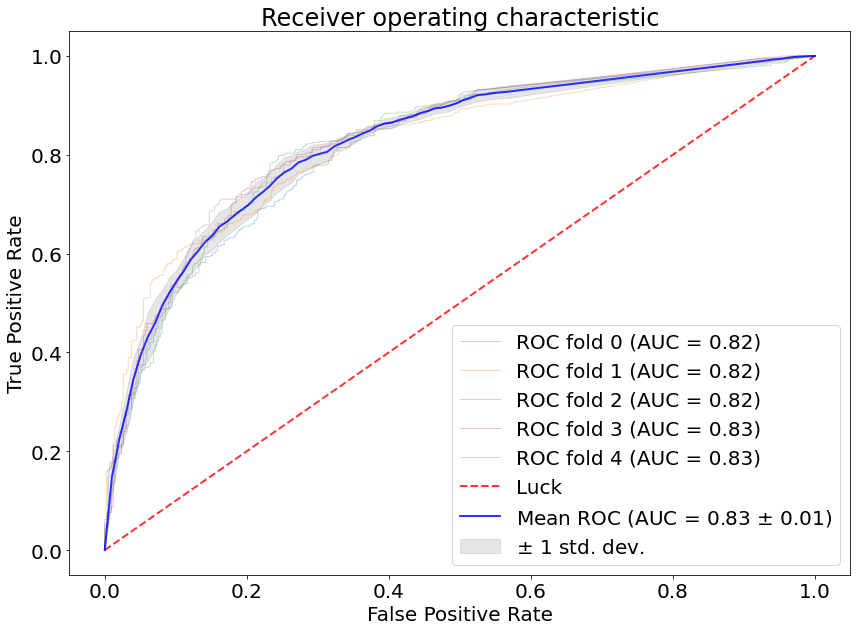

,AUC Train,AUC Test
0,0.914646,0.817313
1,0.917074,0.822337
2,0.912838,0.824228
3,0.915659,0.832353
4,0.914862,0.832434


In [175]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
model = XGBClassifier(max_depth=3, max_delta_step=1, scale_pos_weight=1, subsample=1, colsample_bytree=1,
                     seed=10)
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    tfidfvectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,1), stop_words='english', min_df=1)
    tfidf_train = tfidfvectorizer.fit_transform(X.iloc[train])

    model.fit(tfidf_train, y.iloc[train])
    tfidf_test = tfidfvectorizer.transform(X.iloc[test])
    _, _, auc_score_train = compute_roc_auc(tfidf_train, train, model)
    fpr, tpr, auc_score = compute_roc_auc(tfidf_test, test, model)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

<1x7765 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [158]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
for (train, test), i in zip(cv.split(tfidf_x, y), range(5)):
    #print(train)
    print(tfidf_x.iloc[train], y.iloc[train])
    print("######")

[   0    1    2 ... 4210 4211 4212]
######
[   0    2    3 ... 4210 4211 4212]
######
[   1    2    3 ... 4208 4210 4212]
######
[   0    1    3 ... 4209 4210 4211]
######
[   0    1    2 ... 4209 4211 4212]
######


In [153]:
X

0       pretty vague know regard specific section life...
1       idk red pill mean exactly advice treating righ...
2       think social anxiety creates paranoid feeling ...
3       chance think loop junk food make depressed dep...
4       depression sadness caused something healthy de...
                              ...                        
4208                                          gospel ruth
4209    counter clockwise bit much even real anti vaxx...
4210                                    get woke go broke
4211                  always fairly short   supposed joke
4212             want populated limited set thus discrete
Name: response_post, Length: 4213, dtype: object